# Support Vector Regression (SVR)

##Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##Importing the Dataset

In [2]:
dataset = pd.read_csv('/content/drive/MyDrive/Machine Learning A-Z (Codes and Datasets)/Part 2 - Regression/Section 7 - Support Vector Regression (SVR)/Python/Position_Salaries.csv')
x = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [3]:
print(y.shape)#its an 1d arrray

(10,)


In [4]:
y = y.reshape(len(y), -1)
print(y.shape) #2d array

(10, 1)


## Feature Scaling


In [5]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)

In [6]:
print(x)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [7]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


##Training the SVR model on the whole dataset

In [8]:
from sklearn.svm import SVR
svr_regressor = SVR(kernel = 'rbf')
svr_regressor.fit(x, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result


In [9]:
svr_regressor.predict(sc_x.transform([[6.5]]))

array([-0.27861589])

In [10]:
sc_y.inverse_transform(svr_regressor.predict(sc_x.transform([[6.5]])))

ValueError: ignored

In [11]:
sc_y.inverse_transform([(svr_regressor.predict(sc_x.transform([[6.5]])))])

array([[170370.0204065]])

## Visualising the SVR results


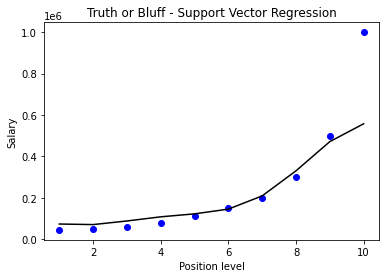

In [16]:
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color = 'blue')
plt.plot(sc_x.inverse_transform(x), (sc_y.inverse_transform([(svr_regressor.predict(x))])).reshape(len(y), 1), color = 'black')
plt.title('Truth or Bluff - Support Vector Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [13]:
sc_y.inverse_transform([svr_regressor.predict(x)])

array([[ 73474.15615697,  70786.94584626,  88213.00902103,
        108254.98574956, 122574.52250599, 145503.10688572,
        209410.23132923, 330606.89204569, 471671.95587315,
        557821.75899897]])

In [14]:
sc_x.inverse_transform(x.reshape(1, len(x)))

array([[ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]])

## Visualising the SVR results (for higher resolution and smoother curve)

In [ ]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid))), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()